In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [26]:
#percent of null values in train
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [27]:
#percent of null values in test
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

#### Both Train and Test dataset have missing values in only 2 columns "Item_Weight" and "Outlet_Size" and have almost same proportion of missing data in both columns. Also, "Item_Weight" is a numerical feature and "Outlet_Size" is a categorical feature, so they should be treated accordingly during Feature Engineering

#### Relation b/w missing values and Sales(target variable)

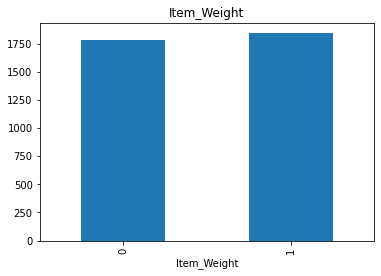

In [61]:
data = train.copy()

data["Item_Weight"] = np.where(data["Item_Weight"].isnull(),1,0)

#Plot median sale price where information is present or absent
data.groupby("Item_Weight")["Item_Outlet_Sales"].median().plot.bar()
plt.title("Item_Weight")
plt.show()

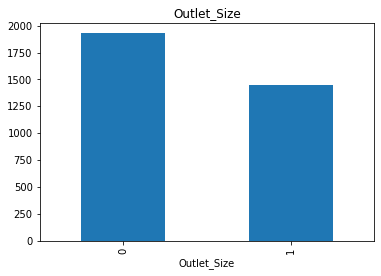

In [62]:
data["Outlet_Size"] = np.where(data["Outlet_Size"].isnull(),1,0)

#Plot median sale price where information is present or absent
data.groupby("Outlet_Size")["Item_Outlet_Sales"].median().plot.bar()
plt.title("Outlet_Size")
plt.show()

#### Here the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful in the Feature Engineering phase

In [36]:
#categorical features - include features with dtypes as object
categorical = train.select_dtypes(include=[np.object])
print("Categorical Features in Train dataset:",categorical.shape[1])

#numerical features - include features with dtypes as float and int
categorical = train.select_dtypes(include=[np.float64,np.int64])
print("Numerical Features in Train dataset:",categorical.shape[1])

Categorical Features in Train dataset: 7
Numerical Features in Train dataset: 5


#### These categorical and numerical features should be treated in respective ways during Feature Engineering phase 

In [69]:
#List of Numerical features
numerical_features = [feature for feature in train.columns if train[feature].dtype != 'O']
train[numerical_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


Text(0.5, 1.0, 'Sales vs Year Established')

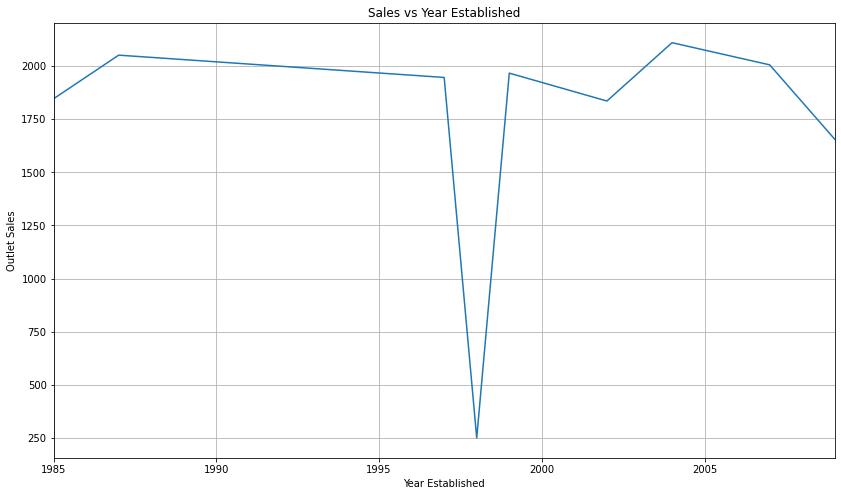

In [77]:
#Checking whether there is a relation between outlet establishment year and the Outlet Sales
plt.figure(figsize=(14,8))
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Year Established')
plt.ylabel('Outlet Sales')
plt.grid()
plt.title("Sales vs Year Established")

#### Due to some reason perhaps, the outlet sales dipped to a great extent in the year 1998.

In [80]:
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].median()

Outlet_Establishment_Year
1985    1845.5976
1987    2050.6640
1997    1945.8005
1998     250.3408
1999    1966.1074
2002    1834.9448
2004    2109.2544
2007    2005.0567
2009    1655.1788
Name: Item_Outlet_Sales, dtype: float64

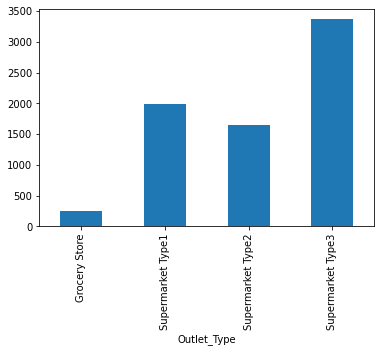

In [104]:
train.groupby("Outlet_Type")["Item_Outlet_Sales"].median().plot.bar()

#### Sales from "Grocery stores" is minimum among all types of outlets.

In [115]:
pd.pivot_table(train,"Item_Outlet_Sales",index=["Outlet_Establishment_Year"],columns=["Outlet_Type"],aggfunc=np.median, margins=True, margins_name='Median Sales')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Median Sales
Outlet_Establishment_Year,,,,,
1985,265.3213,NaN,NaN,3364.9532,1845.5976
1987,NaN,2050.6640,NaN,NaN,2050.6640
1997,NaN,1945.8005,NaN,NaN,1945.8005
1998,250.3408,NaN,NaN,NaN,250.3408
1999,NaN,1966.1074,NaN,NaN,1966.1074
2002,NaN,1834.9448,NaN,NaN,1834.9448
2004,NaN,2109.2544,NaN,NaN,2109.2544
2007,NaN,2005.0567,NaN,NaN,2005.0567
2009,NaN,NaN,1655.1788,NaN,1655.1788


#### From here, we can see that sales in 1998 was only from the grocery stores, which also have the lowest sale value among given different type of outlets.
#### This can be a reason for a drastic decline in the sales value in year 1998.

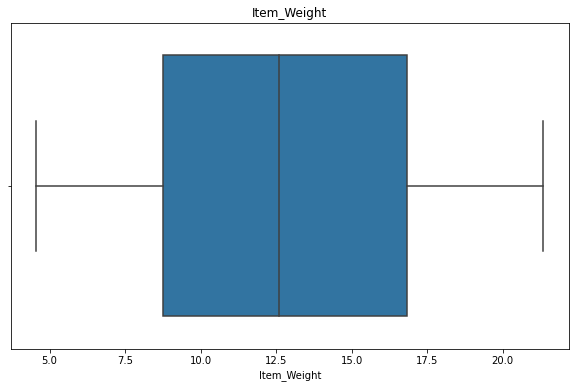

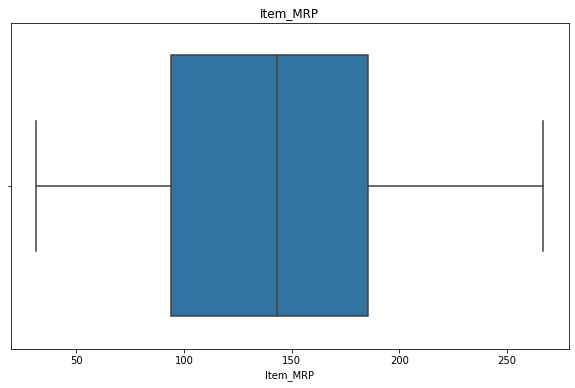

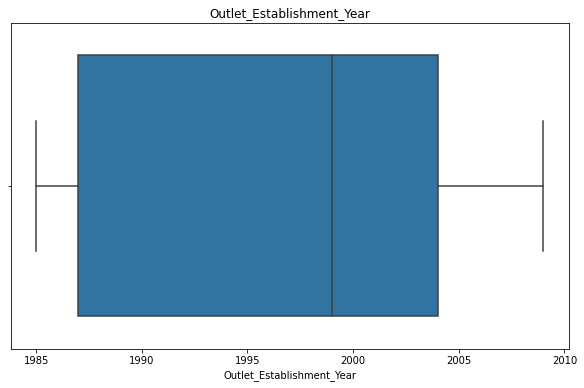

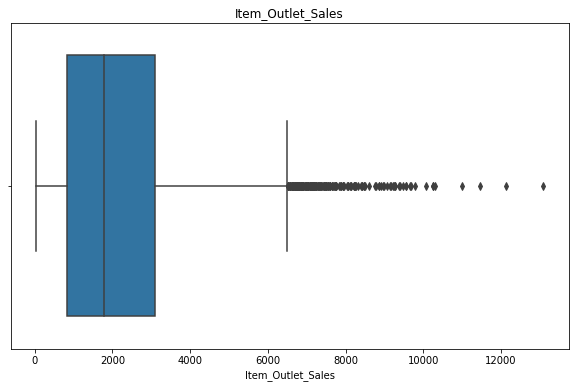

In [128]:
data = train.copy()

#Checking Outliers
for feature in numerical_features:
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(10,6))
        #data[feature]=np.log(data[feature])
        sns.boxplot(feature,data=data)
        plt.title(feature)

#### Numerical Features doesn't have outliers, that means missing values can also be imputed with with normal mean value

In [116]:
#List of Categorical features
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']
train[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [136]:
for feature in categorical_features:
    print("Number of categories in '{}' = {}".format(feature, len(train[feature].unique())))

Number of categories in 'Item_Identifier' = 1559
Number of categories in 'Item_Fat_Content' = 5
Number of categories in 'Item_Type' = 16
Number of categories in 'Outlet_Identifier' = 10
Number of categories in 'Outlet_Size' = 4
Number of categories in 'Outlet_Location_Type' = 3
Number of categories in 'Outlet_Type' = 4


In [137]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### The categories in 'Item_Fat_Content' feature have different names which mean same thing. This should be handled during Feature Engineering phase.

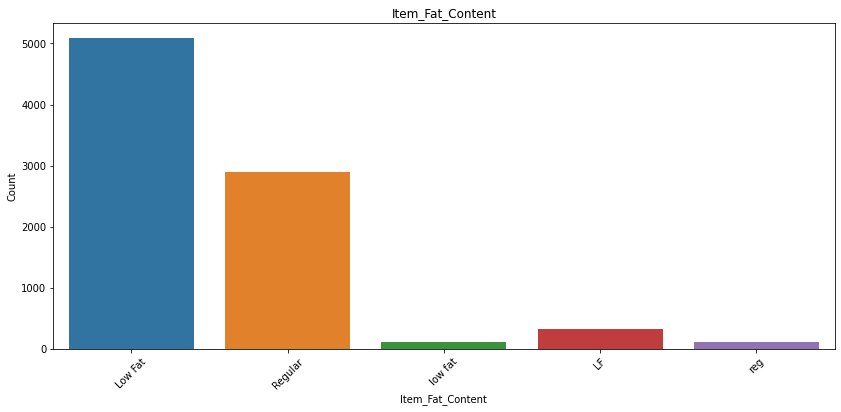

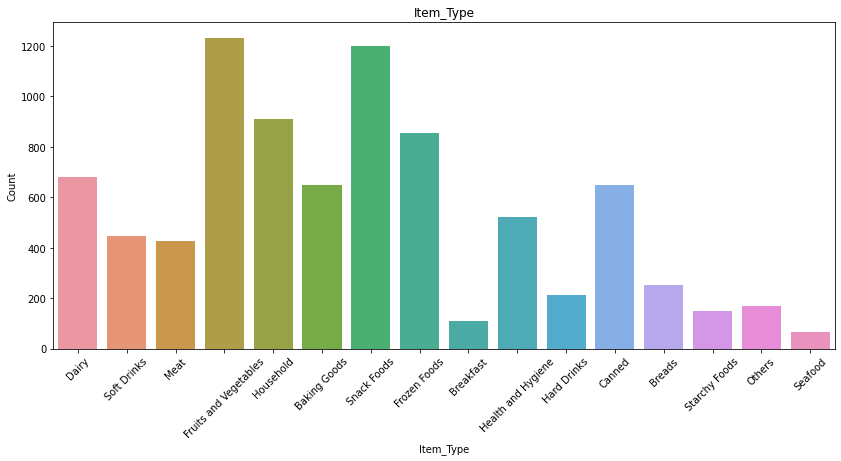

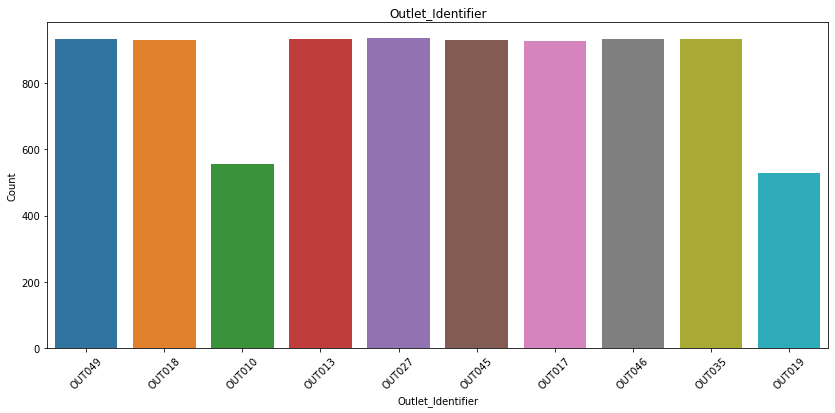

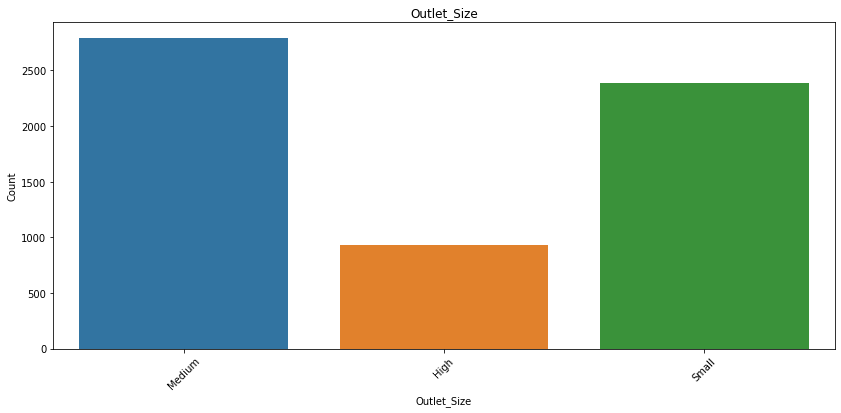

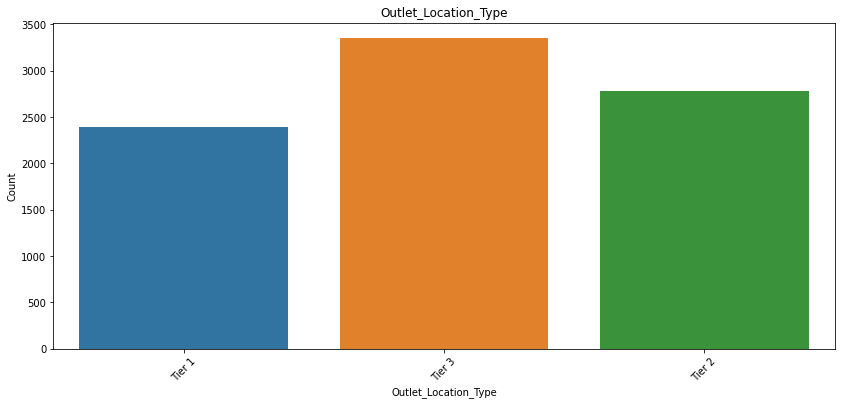

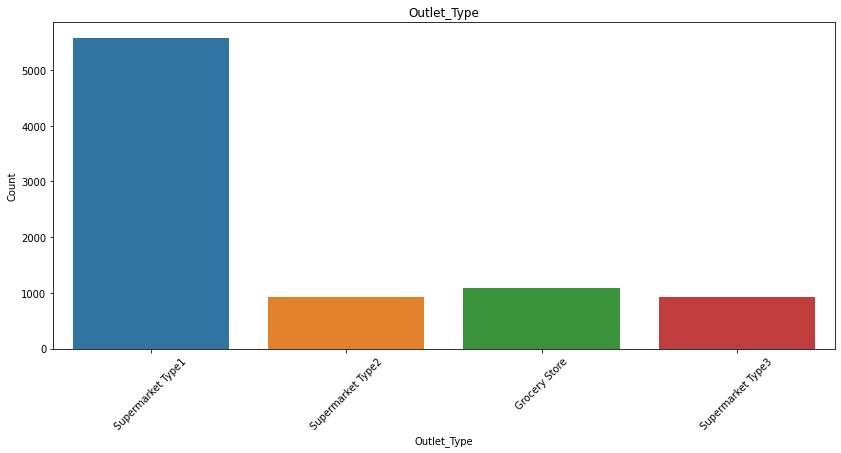

In [144]:
#Plot to observe count frequency of each categorical variabe in data 
data = train.copy()

for feature in categorical_features:
    if feature != 'Item_Identifier':
        plt.figure(figsize=(14,6))
        sns.countplot(x=feature, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.title(feature)
        plt.show()

#### Some important observations from above plot are:
* Fruits, vegetables and snack foods are largele sold at the stores
* Most of the outlets are of 'Medium size'
* Outlets are mostly present in 'Tier3' cities
* Supermarket Type1 outlets are more

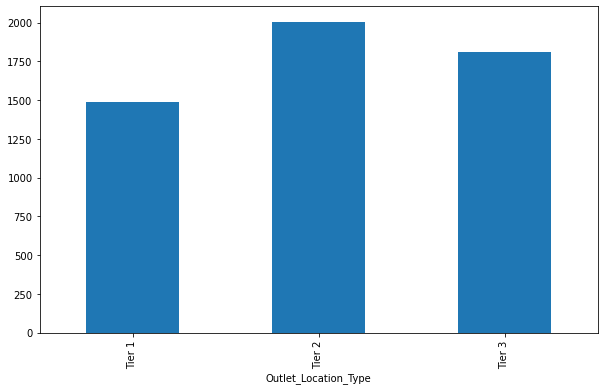

In [147]:
plt.figure(figsize=(10,6))
train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].median().plot.bar()

#### Though the number of outlets are more in Tier 3 cities, total sales are more in Tier 2 citie. This can be one of the opportunity for BigMart to expand their revenue by increasing stores in Tier2 cities.  

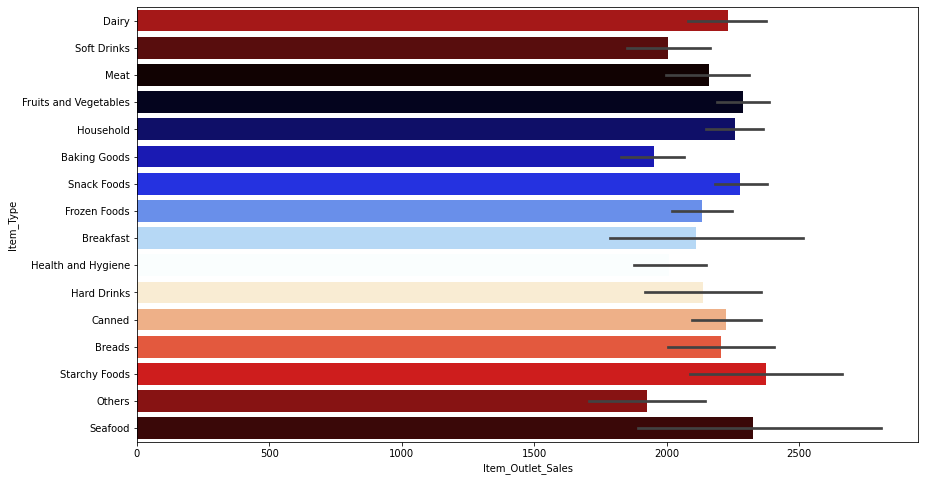

In [149]:
plt.figure(figsize=(14,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

#### Maximum products available at stores were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.